In [24]:
library(ggplot2)
library(reshape2)
library(RColorBrewer)
suppressMessages(library(plyr))
suppressMessages(library(dplyr))
library(stringr)
suppressMessages(library(tidyr))
theme_set(theme_bw())
library(parallel)
library(scales)
library(knitr)
library(IRdisplay)
suppressWarnings(suppressMessages(library(Biostrings)))

isotypes = c('Ala', 'Arg', 'Asn', 'Asp', 'Cys', 'Gln', 'Glu', 'Gly', 'His', 'Ile', 'iMet', 'Leu', 'Lys', 'Met', 'Phe', 'Pro', 'Ser', 'Thr', 'Trp', 'Tyr', 'Val')
display_positions = c('X1.72'='1:72', 'X2.71'='2:71', 'X3.70'='3:70', 'X4.69'='4:69', 'X5.68'='5:68', 'X6.67'='6:67', 'X7.66'='7:66', 'X8'='8', 'X9'='9', 'X10.25'='10:25', 'X11.24'='11:24', 'X12.23'='12:23', 'X13.22'='13:22', 'X14'='14', 'X15'='15', 'X16'='16', 'X17'='17', 'X17a'='17a', 'X18'='18', 'X19'='19', 'X20'='20', 'X20a'='20a', 'X20b'='20b', 'X21'='21', 'X26'='26','X27.43'='27:43', 'X28.42'='28:42', 'X29.41'='29:41', 'X30.40'='30:40', 'X31.39'='31:39', 'X32'='32', 'X33'='33', 'X34'='34', 'X35'='35', 'X36'='36', 'X37'='37', 'X38'='38', 'X44'='44', 'X45'='45', 'X46'='46', 'X47'='47', 'X48'='48', 'X49.65'='49:65', 'X50.64'='50:64', 'X51.63'='51:63', 'X52.62'='52:62', 'X53.61'='53:61', 'X54'='54', 'X55'='55', 'X56'='56', 'X57'='57', 'X58' = '58', 'X59'='59', 'X60'='60', 'X73'='73')

# includes all paired including 3d
#paired_positions = c('X1.72'='1:72', 'X2.71'='2:71', 'X3.70'='3:70', 'X4.69'='4:69', 'X5.68'='5:68', 'X6.67'='6:67', 'X7.66'='7:66', 'X8.14'='*8:14', 'X9.23'='*9:23', 'X10.25'='10:25', 'X10.45'='*10:45', 'X11.24'='11:24', 'X12.23'='12:23', 'X13.22'='13:22', 'X15.48'='*15:48','X18.55'='*18:55', 'X19.56'='*19:56', 'X22.46'='*22:46', 'X26.44'='*26:44', 'X27.43'='27:43', 'X28.42'='28:42', 'X29.41'='29:41', 'X30.40'='30:40', 'X31.39'='31:39', 'X49.65'='49:65', 'X50.64'='50:64', 'X51.63'='51:63', 'X52.62'='52:62', 'X53.61'='53:61', 'X54.58'='*54:58')
# filtered version of paired positions
paired_positions = c('X1.72'='1:72', 'X2.71'='2:71', 'X3.70'='3:70', 'X4.69'='4:69', 'X5.68'='5:68', 'X6.67'='6:67', 'X7.66'='7:66', 'X8.14'='*8:14', 'X10.25'='10:25', 'X11.24'='11:24', 'X12.23'='12:23', 'X13.22'='13:22', 'X15.48'='*15:48','X18.55'='*18:55', 'X19.56'='*19:56', 'X27.43'='27:43', 'X28.42'='28:42', 'X29.41'='29:41', 'X30.40'='30:40', 'X31.39'='31:39', 'X49.65'='49:65', 'X50.64'='50:64', 'X51.63'='51:63', 'X52.62'='52:62', 'X53.61'='53:61', 'X54.58'='*54:58')
paired_identities = c('GC', 'AU', 'UA', 'CG', 'GU', 'UG', 'PurinePyrimidine', 'PyrimidinePurine', 'StrongPair', 'WeakPair', 'AminoKeto', 'KetoAmino', 'Wobble', 'Paired', 'Bulge', 'Mismatched', 'Absent')

single_positions = c('X8'='8', 'X9'='9', 'X14'='14', 'X15'='15', 'X16'='16', 'X17'='17', 'X17a'='17a', 'X17b'='17b', 'X18'='18', 'X19'='19', 'X20'='20', 'X20a'='20a', 'X20b'='20b', 'X21'='21', 'X26'='26', 'X32'='32', 'X33'='33', 'X34'='34', 'X35'='35', 'X36'='36', 'X37'='37', 'X38'='38', 'X44'='44', 'X45'='45', 'X46'='46', 'X47'='47', 'X48'='48', 'X54'='54', 'X55'='55', 'X56'='56', 'X57'='57', 'X58'='58', 'X59'='59', 'X60'='60', 'X73'='73')
single_identities = c('A', 'C', 'G', 'U', 'Purine', 'Pyrimidine', 'Weak', 'Strong', 'Amino', 'Keto', 'B', 'D', 'H', 'V', 'Absent')

colors = c('A '='gray20', 'C '='gray20', 'G '='gray20', 'U '='gray20', 'Absent '='gray20', 'Purine '='gray20', 'Pyrimidine '='gray20', 'Weak'='gray20', 'Strong'='gray20', 'Amino'='gray20', 'Keto'='gray20', 'B'='gray50', 'D'='gray50', 'H'='gray50', 'V'='gray50', 'GC'='gray20', 'AU'='gray20', 'UA'='gray20', 'CG'='gray20', 'GU'='gray20', 'UG'='gray20', 'PurinePyrimidine'='gray20', 'PyrimidinePurine'='gray20', 'StrongPair'='gray20', 'WeakPair'='gray20', 'AminoKeto'='gray20', 'KetoAmino'='gray20', 'Wobble'='gray20', 'Paired '='gray20', 'Bulge '='gray20', 'Mismatched '='gray20')
fills = c('A '='#ffd92f', 'C '='#4daf4a', 'G '='#e41a1c', 'U '='#377eb8', 'Purine '='#ff8300', 'Pyrimidine '='#66c2a5', 'Weak'='#b3de69', 'Strong'='#fb72b2', 'Amino'='#c1764a', 'Keto'='#b26cbd', 'B '='#e5c494', 'D'='#ccebd5', 'H'='#ffa79d', 'V'='#a6cdea', 'Absent '='gray60', 'Mismatched '='gray30', 'Paired '='#ffffcc')

# simple codes for reviewer #3
simple_identities = c('A' = 'A ', 'C' = 'C ', 'G' = 'G ', 'U' = 'U ', 'Purine' = 'Purine ', 'Pyrimidine' = 'Pyrimidine ', 
                      'Weak' = 'A/U (W) ', 'Strong' = 'G/C (S) ', 'Amino' = 'A/C (M) ', 'Keto' = 'G/U (K) ', 
                      'B' = 'C/G/U (B) ', 'D' = 'A/G/U (D) ', 'H' = 'A/C/U (H) ', 'V' = 'A/C/G (V) ', 'Absent' = 'Absent ', 'Paired' = 'Paired ', 'Mismatched' = 'Mismatched ')
colors = c(colors, 'A/U (W) ' = 'gray20', 'G/C (S) ' = 'gray20', 'A/C (M) ' ='gray20', 'G/U (K) ' = 'gray20', 'C/G/U (B) ' = 'gray50', 'A/G/U (D) ' = 'gray50', 'A/C/U (H) ' = 'gray50', 'A/C/G (V) ' = 'gray50')
fills = c(fills, 'A/U (W) ' = '#b3de69', 'G/C (S) ' = '#fb72b2', 'A/C (M) ' ='#c1764a', 'G/U (K) ' = '#b26cbd', 'C/G/U (B) ' = '#e5c494', 'A/G/U (D) ' = '#ccebd5', 'A/C/U (H) ' = '#ffa79d', 'A/C/G (V) ' = '#a6cdea')

# Introduction


Like in eukaryotes, we need to find the consensus features within bacteria / archaea, and generate heatmaps.

# Data wrangling

## Data import

Rather than work around R's idiosyncracies, I'll set `fMet` as `iMet`. Even if this upsets Patricia, I don't have to spend a couple of days trying to visualize missing isotypes.

In [2]:
identities = read.delim('identities.tsv', sep='\t', stringsAsFactors=FALSE)
identities$restrict = as.logical(identities$restrict)
identities = identities %>% filter(!restrict, !(isotype %in% c('SeC', 'Sup'))) %>%
  mutate(isotype = ifelse(isotype == 'fMet', 'iMet', isotype))
positions = colnames(identities)[which(str_detect(colnames(identities), "X\\d+\\.\\d+$"))]
positions = c(positions, 'X8', 'X9', 'X14', 'X15', 'X16', 'X17', 'X17a', 'X18', 'X19', 'X20', 'X20a', 'X20b', 'X21', 'X26', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X44', 'X45', 'X46', 'X47', 'X48', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X73')

## Get frequencies


In [3]:
get_clade_iso_freqs = function(identities) {
  identities %>% 
    filter(!restrict) %>%
    select(match(c('clade', 'isotype', positions), colnames(identities))) %>%
    gather(positions, bases, -clade, -isotype) %>%
    group_by(clade, isotype, positions, bases) %>%
    tally %>%
    group_by(clade, isotype, positions) %>%
    summarize(A = sum(n[bases == "A"]),
              C = sum(n[bases == "C"]),
              G = sum(n[bases == "G"]),
              U = sum(n[bases == "U"]),
              GC = sum(n[bases == "G:C"]),
              AU = sum(n[bases == "A:U"]),
              UA = sum(n[bases == "U:A"]),
              CG = sum(n[bases == "C:G"]),
              GU = sum(n[bases == "G:U"]),
              UG = sum(n[bases == "U:G"]),
              Paired = sum(n[bases %in% c("A:U", "U:A", "C:G", "G:C", "G:U", "U:G")]),
              Absent = sum(n[bases %in% c("-", ".", "-:-")]),
              Bulge = sum(n[bases %in% c("A:-", "U:-", "C:-", "G:-", "-:A", "-:G", "-:C", "-:U")]),
              Mismatched = sum(n[bases %in% c("A:A", "G:G", "C:C", "U:U", "A:G", "A:C", "C:A", "C:U", "G:A", "U:C")]),
              Purine = sum(n[(bases %in% c("A", "G")) & (n / sum(n) >= 0.05)]),
              Pyrimidine = sum(n[(bases %in% c("C", "U")) & (n / sum(n) >= 0.05)]),
              Weak = sum(n[(bases %in% c("A", "U")) & (n / sum(n) >= 0.05)]),
              Strong = sum(n[(bases %in% c("G", "C")) & (n / sum(n) >= 0.05)]),
              Amino = sum(n[(bases %in% c("A", "C")) & (n / sum(n) >= 0.05)]),
              Keto = sum(n[(bases %in% c("G", "U")) & (n / sum(n) >= 0.05)]),
              B = sum(n[(bases %in% c("C", "G", "U")) & (n / sum(n) >= 0.05)]),
              D = sum(n[(bases %in% c("A", "G", "U")) & (n / sum(n) >= 0.05)]),
              H = sum(n[(bases %in% c("A", "C", "U")) & (n / sum(n) >= 0.05)]),
              V = sum(n[(bases %in% c("A", "C", "G")) & (n / sum(n) >= 0.05)]),
              D = sum(n[(bases %in% c("A", "G", "U")) & (n / sum(n) >= 0.05)]),
              PurinePyrimidine = sum(n[(bases %in% c("A:U", "G:C")) & (n / sum(n) >= 0.05)]),
              PyrimidinePurine = sum(n[(bases %in% c("U:A", "C:G")) & (n / sum(n) >= 0.05)]),
              StrongPair = sum(n[(bases %in% c("G:C", "C:G")) & (n / sum(n) >= 0.05)]),
              WeakPair = sum(n[(bases %in% c("A:U", "U:A")) & (n / sum(n) >= 0.05)]),
              AminoKeto = sum(n[(bases %in% c('AU', 'CG', 'AminoKeto')) & (n / sum(n) >= 0.05)]),
              KetoAmino = sum(n[(bases %in% c('UA', 'GC', 'KetoAmino')) & (n / sum(n) >= 0.05)]),
              Wobble = sum(n[(bases %in% c("G:U", "U:G")) & (n / sum(n) >= 0.05)])) %>%
    mutate(clade_iso_pos_total = A + C + G + U + Paired + Absent + Bulge + Mismatched) %>%
    gather(feature, n, -clade, -isotype, -positions, -clade_iso_pos_total) %>%
    mutate(freq = n/clade_iso_pos_total)
}

bact_clade_iso_freqs = get_clade_iso_freqs(identities %>% filter(domain == "bacteria"))
arch_clade_iso_freqs = get_clade_iso_freqs(identities %>% filter(domain == "archaea"))

code_groups = c('A'=1, 'C'=1, 'G'=1, 'U'=1, 'Absent'=1, 
                'GC'=1, 'AU'=1, 'UA'=1, 'CG'=1, 'GU'=1, 'UG'=1,
                'Purine'=2, 'Pyrimidine'=2,
                'Weak'=3, 'Strong'=3, 'Amino'=3, 'Keto'=3,
                'B'=4, 'D'=4, 'H'=4, 'V'=4,
                'StrongPair'=2, 'WeakPair'=2, 'Wobble'=2,
                'PurinePyrimidine'=3, 'PyrimidinePurine'=3, 'AminoKeto'=3, 'KetoAmino'=3,
                'Paired'=4, 'Mismatched'=4, 'Bulge'=4)

In [4]:
# remove duplicates
bact_best_freqs = bact_clade_iso_freqs %>%
  filter(freq > 0.9) %>%
  group_by(clade, isotype, positions) %>%
  arrange(code_groups[feature], desc(freq)) %>%
  filter(row_number(positions) == 1)

arch_best_freqs = arch_clade_iso_freqs %>%
  filter(freq > 0.9) %>%
  group_by(clade, isotype, positions) %>%
  arrange(code_groups[feature], desc(freq)) %>%
  filter(row_number(positions) == 1)

# Consensus sequence features

In [15]:
get_consensus_feature = function(domain, position, codes) {
  position = unique(position)
  best_codes = resolve_code(codes) # returns a vector of all possible combinations of bases. Note that this is not limited to the basic combinations given by the codes variable.
  if (length(position) != 1) stop("Multiple positions passed to function")
  if (domain == "bacteria" & length(codes) != 154) return("N/A") # make sure that each isotype/clade is represented
  if (domain == "archaea" & length(codes) != 44) return("N/A")
  if (length(best_codes) == 0) return("N/A")
  codes = list(A="A", C="C", G="G", U="U", Absent=c("-", ".", "-:-"), Purine=c("A", "G"), Pyrimidine=c("C", "U"), Weak=c("A", "U"), Strong=c("G", "C"), Amino=c("A", "C"), Keto=c("G", "U"), B=c("C", "G", "U"), D=c("A", "G", "U"), H=c("A", "C", "U"), V=c("A", "C", "G"), D=c("A", "G", "U"), GC="G:C", AU="A:U", UA="U:A", CG="C:G", GU="G:U", UG= "U:G", PurinePyrimidine=c("A:U", "G:C"), PyrimidinePurine=c("U:A", "C:G"), AminoKeto=c("A:U", "C:G"), KetoAmino=c("U:A", "G:C"), StrongPair=c("G:C", "C:G"), WeakPair=c("A:U", "U:A"), Wobble=c("G:U", "U:G"), Paired=c("A:U", "U:A", "C:G", "G:C", "G:U", "U:G"), Bulge=c("A:-", "U:-", "C:-", "G:-", "-:A", "-:G", "-:C", "-:U"), Mismatched=c("A:A", "G:G", "C:C", "U:U", "A:G", "A:C", "C:A", "C:U", "G:A", "U:C"))   # for each possible code, check each species
  # for each possible code, check each species
  # this ensures that we consider other IDEs if the most specific one fails the species check. For example, if "Purine" fails, we also consider "V"
  species_check = sapply(best_codes, function(code) {
    codes_str = paste0("c('", paste0(codes[[code]], collapse="', '"), "')")
    df = identities %>% filter_(paste0("domain == '", domain, "'")) %>%
           select_('species', 'isotype', position) %>%
           group_by_('species', 'isotype') %>% 
           summarize_(match = paste0("sum(", position, " %in% ", codes_str, ")"),
                      miss = paste0("sum(!(", position, " %in% ", codes_str, "))")) %>%
           mutate(ubiquitous = (match / (match + miss)) > 0.1)
    all(df$ubiquitous)
  })
  ide = names(species_check[species_check])[1]
  return(ifelse(is.na(ide), "N/A", ide))
}

resolve_code = function(codes) {
  codes = unique(codes)
  x = c(A = all(codes %in% 'A'),
        C = all(codes %in% 'C'),
        G = all(codes %in% 'G'),
        U = all(codes %in% 'U'),
        Absent = all(codes %in% 'Absent'),
        Purine = all(codes %in% c('A', 'G', 'Purine')),
        Pyrimidine = all(codes %in% c('C', 'U', 'Pyrimidine')),
        Weak = all(codes %in% c('A', 'U', 'Weak')),
        Strong = all(codes %in% c('G', 'C', 'Strong')),
        Amino = all(codes %in% c('A', 'C', 'Amino')),
        Keto = all(codes %in% c('G', 'U', 'Keto')),
        B = all(codes %in% c('C', 'G', 'U', 'B', 'Strong', 'Pyrimidine', 'Keto')),
        D = all(codes %in% c('A', 'G', 'U', 'D', 'Purine', 'Weak', 'Keto')),
        H = all(codes %in% c('A', 'C', 'U', 'H', 'Amino', 'Weak', 'Pyrimidine')),
        V = all(codes %in% c('A', 'C', 'G', 'V', 'Amino', 'Purine', 'Strong')),
        GC = all(codes %in% 'GC'),
        AU = all(codes %in% 'AU'),
        UA = all(codes %in% 'UA'),
        CG = all(codes %in% 'CG'),
        GU = all(codes %in% 'GU'),
        UG = all(codes %in% 'UG'),
        PurinePyrimidine = all(codes %in% c('AU', 'GC', 'PurinePyrimidine')),
        PyrimidinePurine = all(codes %in% c('UA', 'CG', 'PyrimidinePurine')),
        StrongPair = all(codes %in% c('GC', 'CG', 'StrongPair')),
        WeakPair = all(codes %in% c('AU', 'UA', 'WeakPair')),
        AminoKeto = all(codes %in% c('AU', 'CG', 'AminoKeto')),
        KetoAmino = all(codes %in% c('UA', 'GC', 'KetoAmino')),
        Wobble = all(codes %in% c('GU', 'UG', 'Wobble')),
        Paired = all(codes %in% c('AU', 'UA', 'CG', 'GC', 'GU', 'UG', 'Paired', 'PurinePyrimidine', 'PyrimidinePurine', 'StrongPair', 'WeakPair', 'AminoKeto', 'KetoAmino', 'Wobble')),
        Bulge = all(codes %in% 'Bulge'),
        Mismatched = all(codes %in% c('AA', 'GG', 'CC', 'UU', 'AG', 'AC', 'CA', 'CU', 'GA', 'UC', 'Mismatched')))
  return(names(x[which(x)]))
}

In [16]:
bact_consensus = bact_best_freqs %>%
  group_by(positions) %>% 
  summarize(identity = get_consensus_feature("bacteria", positions, feature)) %>%
  filter(identity != "N/A")

arch_consensus = arch_best_freqs %>%
  group_by(positions) %>% 
  summarize(identity = get_consensus_feature("archaea", positions, feature)) %>%
  filter(identity != "N/A")

In [17]:
bact_consensus %>% mutate(domain = "bacteria") %>% rbind(arch_consensus %>% mutate(domain = "archaea")) %>% spread(domain, identity, fill = 'N/A')

,positions,archaea,bacteria
1,X11.24,Paired,Paired
2,X14,A,D
3,X15,Purine,N/A
4,X18,G,D
5,X19,G,D
6,X3.70,N/A,Paired
7,X30.40,StrongPair,N/A
8,X32,Pyrimidine,N/A
9,X33,Pyrimidine,Pyrimidine
10,X34,B,N/A


# Isotype-specific features

In [19]:
get_isotype_IDE = function(domain, isotype, position, codes) {
  isotype = unique(isotype)
  position = unique(position)
  valid_codes = resolve_code(codes) # returns a vector of all possible combinations of bases. Note that this is not limited to the basic combinations given by the codes variable.
  if (length(isotype) != 1) stop("Multiple isotypes passed to function")
  if (length(position) != 1) stop("Multiple positions passed to function")
  if (domain == "bacteria" & length(codes) != 7) return("N/A") # make sure that each clade is represented
  if (domain == "archaea" & length(codes) != 2) return("N/A")
  if (length(valid_codes) == 0) return("N/A")
  codes = list(A="A", C="C", G="G", U="U", Absent=c("-", ".", "-:-"), Purine=c("A", "G"), Pyrimidine=c("C", "U"), Weak=c("A", "U"), Strong=c("G", "C"), Amino=c("A", "C"), Keto=c("G", "U"), B=c("C", "G", "U"), D=c("A", "G", "U"), H=c("A", "C", "U"), V=c("A", "C", "G"), D=c("A", "G", "U"), GC="G:C", AU="A:U", UA="U:A", CG="C:G", GU="G:U", UG= "U:G", PurinePyrimidine=c("A:U", "G:C"), PyrimidinePurine=c("U:A", "C:G"), AminoKeto=c("A:U", "C:G"), KetoAmino=c("U:A", "G:C"), StrongPair=c("G:C", "C:G"), WeakPair=c("A:U", "U:A"), Wobble=c("G:U", "U:G"), Paired=c("A:U", "U:A", "C:G", "G:C", "G:U", "U:G"), Bulge=c("A:-", "U:-", "C:-", "G:-", "-:A", "-:G", "-:C", "-:U"), Mismatched=c("A:A", "G:G", "C:C", "U:U", "A:G", "A:C", "C:A", "C:U", "G:A", "U:C"))   # for each possible code, check each species
  # this ensures that we consider other IDEs if the most specific one fails the species check. For example, if "Purine" fails, we also consider "V"
  for (code in valid_codes) {
    codes_str = paste0("c('", paste0(codes[[code]], collapse="', '"), "')")
    df = identities %>%
           select_('domain', 'species', 'isotype', position) %>%
           filter_(paste0("isotype == '", isotype, "'")) %>%
           filter_(paste0("domain == '", domain, "'")) %>%
           group_by_('species') %>% 
           summarize_(match = paste0("sum(", position, " %in% ", codes_str, ")"),
                      miss = paste0("sum(!(", position, " %in% ", codes_str, "))")) %>%
           mutate(ubiquitous = (match / (match + miss)) > 0.1)
    if (all(df$ubiquitous)) return(code)
  }
  return("N/A")
}

In [20]:
bact_isotype_specific = bact_best_freqs %>%
  group_by(isotype, positions) %>% 
  summarize(identity = get_isotype_IDE("bacteria", isotype, positions, feature)) %>%
  filter(identity != "N/A")

In [21]:
arch_isotype_specific = arch_best_freqs %>%
  group_by(isotype, positions) %>% 
  summarize(identity = get_isotype_IDE("archaea", isotype, positions, feature)) %>%
  filter(identity != "N/A")

In [22]:
get_5prime = Vectorize(function(identity) c("A"="A", "G"="G", "C"="C", "U"="U", "Purine"="Purine", "Pyrimidine"="Pyrimidine", "Amino"="Amino", "Keto"="Keto", "Weak"="Weak", "Strong"="Strong", "B"="B", "H"="H", "D"="D", "V"="V",
                                            "GC"="G", "AU"="A", "UA"="U", "CG"="C", "GU"="G", "UG"="U", "Absent"="Absent", "PurinePyrimidine"="Purine", "PyrimidinePurine"="Pyrimidine", "StrongPair"="Strong", "WeakPair"="Weak", "AminoKeto"="Amino", "KetoAmino"="Keto", "Paired"="Paired", "Bulge"="Bulge", "Mismatched"="Mismatched")[identity])
get_3prime = Vectorize(function(identity) c("A"="A", "G"="G", "C"="C", "U"="U", "Purine"="Purine", "Pyrimidine"="Pyrimidine", "Amino"="Amino", "Keto"="Keto", "Weak"="Weak", "Strong"="Strong", "B"="B", "H"="H", "D"="D", "V"="V",
                                            "GC"="C", "AU"="U", "UA"="A", "CG"="G", "GU"="U", "UG"="G", "Absent"="Absent", "PurinePyrimidine"="Pyrimidine", "PyrimidinePurine"="Purine", "StrongPair"="Strong", "WeakPair"="Weak", "AminoKeto"="Keto", "KetoAmino"="Amino", "Paired"="Paired", "Bulge"="Bulge", "Mismatched"="Mismatched")[identity])

Warning message:
“Removed 156 rows containing missing values (geom_rect).”Warning message:
“Removed 156 rows containing missing values (geom_tile).”

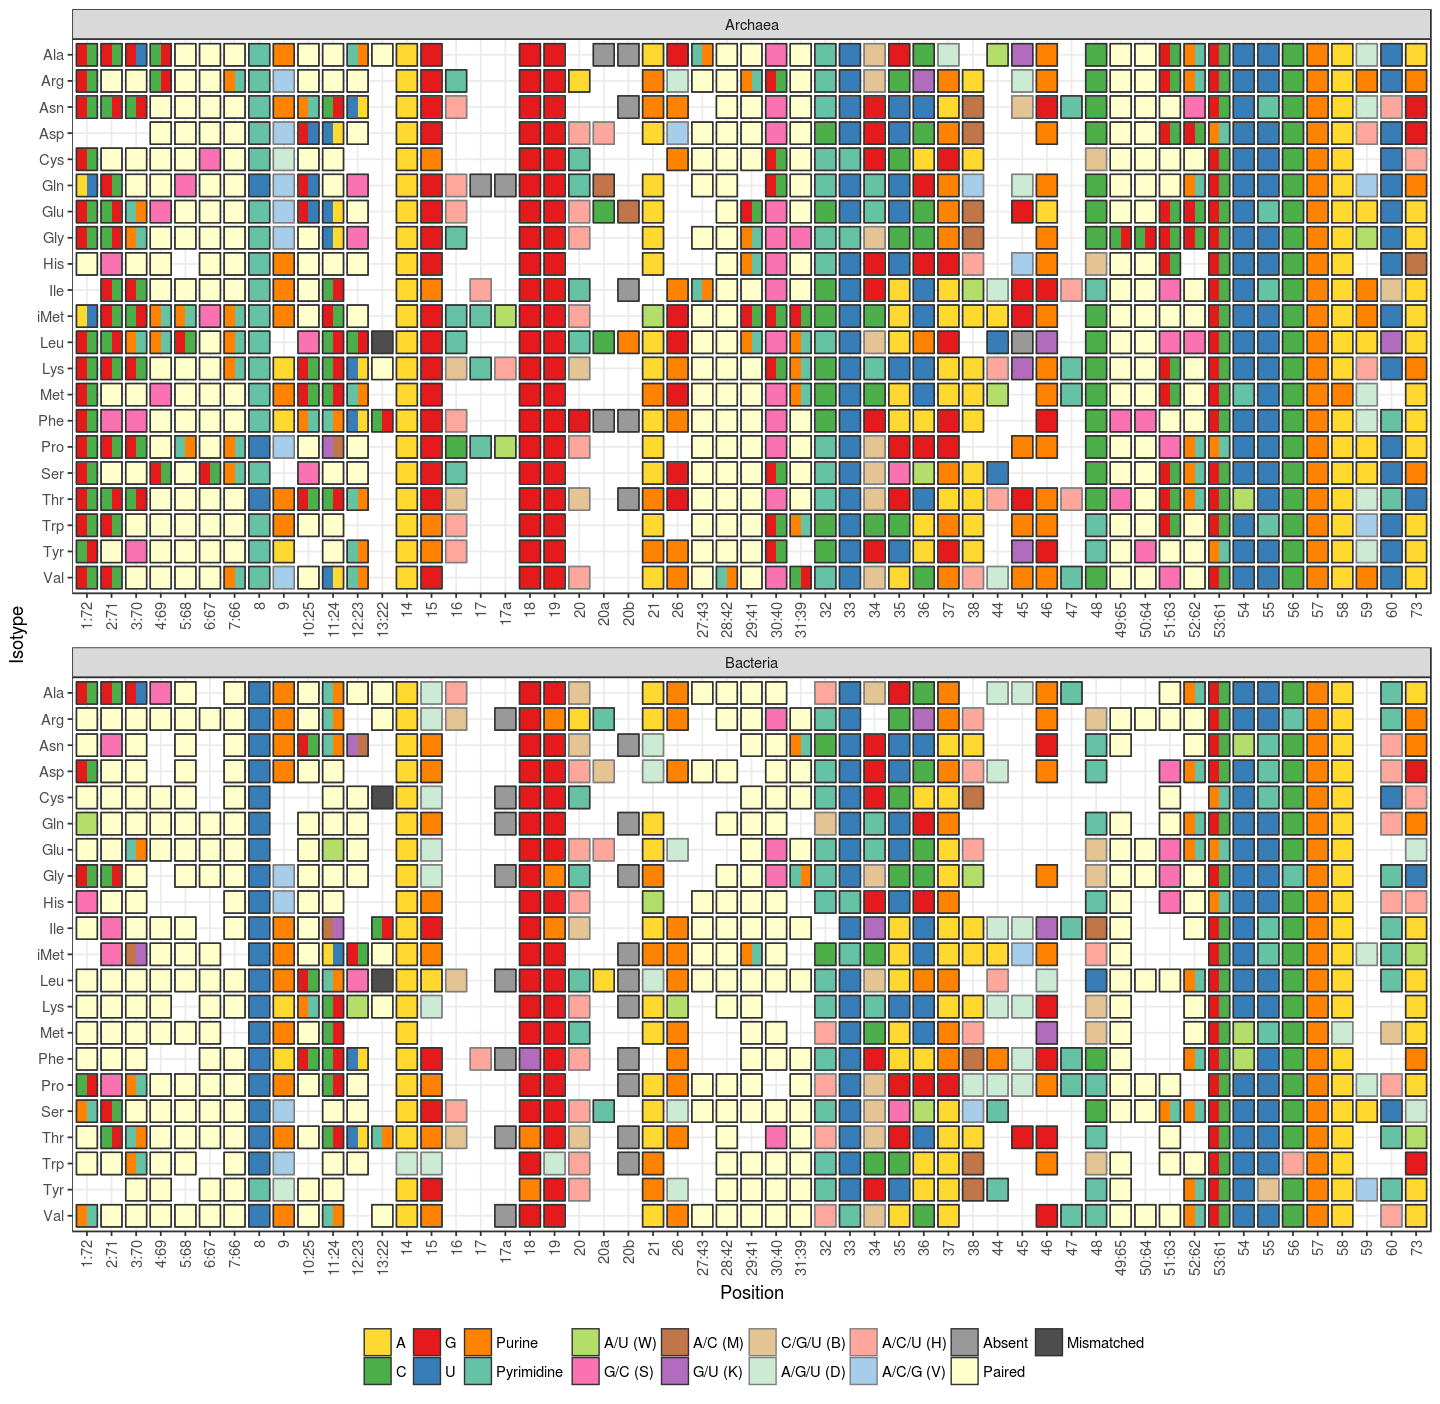

In [25]:
plot = bact_isotype_specific %>% mutate(domain = "Bacteria") %>%
  rbind(arch_isotype_specific %>% mutate(domain = "Archaea")) %>%
  filter(positions %in% names(display_positions)) %>% 
  mutate(positions=factor(positions, names(display_positions))) %>%
  ungroup() %>%
  mutate(isotype=factor(isotype, levels=rev(isotypes))) %>%
  mutate(left=get_5prime(identity), right=get_3prime(identity)) %>%
  gather(side, half_identity, left, right, -isotype, -positions, -identity) %>%
  mutate(half_identity = revalue(half_identity, simple_identities), identity = revalue(identity, simple_identities)) %>% 
  mutate(side = as.integer(as.factor(side)) - 1) %>% 
  mutate(xmin = as.integer(positions) + 0.5 * side - 0.5 + 0.1 * (1 - side),
         xmax = as.integer(positions)+ 0.5 * side - 0.1 * side,
         ymin = as.integer(isotype) - 0.5 + 0.1,
         ymax = as.integer(isotype) + 0.5 - 0.1) %>%
  mutate(half_identity=factor(half_identity)) %>% 
  ggplot() + 
    geom_rect(aes(xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, fill=half_identity)) + 
    geom_tile(aes(x=positions, y=isotype, color=identity), alpha=0, width=0.85, height=0.85, size=0.4) +
    facet_wrap(~ domain, nrow = 2, scales = "free") +
    scale_x_discrete(labels = display_positions, drop = FALSE) +
    scale_y_discrete(limits = rev(isotypes), breaks = rev(isotypes)) +
    scale_color_manual(breaks = simple_identities, values = colors) + 
    scale_fill_manual(breaks = simple_identities, values = fills) +
    guides(fill=guide_legend(title=NULL, nrow=2), color=guide_legend(title=NULL, nrow=2), alpha=FALSE) +    
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5), legend.position='bottom') + 
    labs(x = 'Position', y = 'Isotype')

  
options(repr.plot.width=12, repr.plot.height=11.7)
plot
# ggsave(plot, filename = "fig2-isotype-specific.pdf", width = 12, height = 6.2)

# Isotype-clade-specific features

In [26]:
get_clade_isotype_IDE = function(clade, isotype, position, codes) {
  clade = unique(clade)
  isotype = unique(isotype)
  position = unique(position)
  valid_codes = resolve_code(codes) # returns a vector of all possible combinations of bases. Note that this is not limited to the basic combinations given by the codes variable.
  if (length(clade) != 1) stop("Multiple clades passed to function")
  if (length(isotype) != 1) stop("Multiple clades passed to function")
  if (length(position) != 1) stop("Multiple positions passed to function")
  if (length(valid_codes) == 0) return("N/A")
  codes = list(A="A", C="C", G="G", U="U", Absent=c("-", ".", "-:-"), Purine=c("A", "G"), Pyrimidine=c("C", "U"), Weak=c("A", "U"), Strong=c("G", "C"), Amino=c("A", "C"), Keto=c("G", "U"), B=c("C", "G", "U"), D=c("A", "G", "U"), H=c("A", "C", "U"), V=c("A", "C", "G"), D=c("A", "G", "U"), GC="G:C", AU="A:U", UA="U:A", CG="C:G", GU="G:U", UG= "U:G", PurinePyrimidine=c("A:U", "G:C"), PyrimidinePurine=c("U:A", "C:G"), AminoKeto=c("A:U", "C:G"), KetoAmino=c("U:A", "G:C"), StrongPair=c("G:C", "C:G"), WeakPair=c("A:U", "U:A"), Wobble=c("G:U", "U:G"), Paired=c("A:U", "U:A", "C:G", "G:C", "G:U", "U:G"), Bulge=c("A:-", "U:-", "C:-", "G:-", "-:A", "-:G", "-:C", "-:U"), Mismatched=c("A:A", "G:G", "C:C", "U:U", "A:G", "A:C", "C:A", "C:U", "G:A", "U:C"))   # for each possible code, check each species
  # for each possible code, check each species
  # this ensures that we consider other IDEs if the most specific one fails the species check. For example, if "Purine" fails, we also consider "V"
  for (code in valid_codes) {
    codes_str = paste0("c('", paste0(codes[[code]], collapse="', '"), "')")
    df = identities %>% 
           select_('species', 'isotype', 'clade', position) %>%    
           filter_(paste0("clade == '", clade, "' & isotype == '", isotype, "'")) %>%
           group_by_('species') %>% 
           summarize_(match = paste0("sum(", position, " %in% ", codes_str, ")"),
                      miss = paste0("sum(!(", position, " %in% ", codes_str, "))")) %>%
           mutate(ubiquitous = (match / (match + miss)) > 0.1)
    if (all(df$ubiquitous)) return(code)
  }
  return("N/A")
}

In [27]:
bact_clade_isotype_specific = bact_best_freqs %>%
  group_by(clade, isotype, positions) %>% 
  summarize(identity = get_clade_isotype_IDE(clade, isotype, positions, feature)) %>%
  filter(identity != "N/A")

In [28]:
arch_clade_isotype_specific = arch_best_freqs %>%
  group_by(clade, isotype, positions) %>% 
  summarize(identity = get_clade_isotype_IDE(clade, isotype, positions, feature)) %>%
  filter(identity != "N/A")